In [38]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.io import loadmat
%matplotlib inline
sns.set()
sns.set_style('white')

In [39]:
data = loadmat('ex8data1.mat')
x = data['X']
xval = data['Xval']
yval = data['yval']

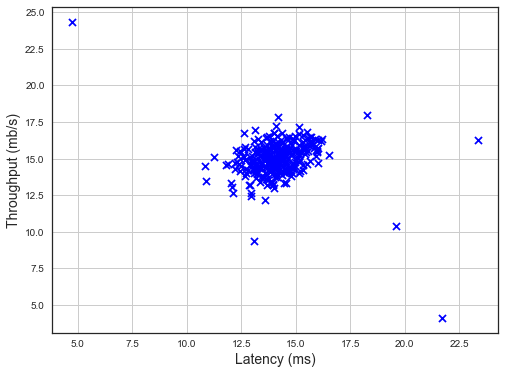

In [40]:
def plotData (x):
    plt.figure(figsize = (8, 6))
    plt.scatter(x[:, 0], x[:, 1], s = 50, c = 'b', marker = 'x', linewidths = 0.1)
    plt.xlabel('Latency (ms)', fontsize = 14)
    plt.ylabel('Throughput (mb/s)', fontsize = 14)
    plt.grid(True)
plotData(x)

In [62]:
def estimateGaussian (x, multiVariate):
    Mu = np.mean(x, axis = 0)
    if multiVariate == False:
        sigma2 = np.mean(np.square(x - Mu), axis = 0)
        return Mu, sigma2
    else:
        sigma2 = ((x - Mu).T.dot(x - Mu)) / x.shape[0]
        return Mu, sigma2

In [63]:
def gaussian (x, Mu, sigma2):
    m = x.shape[0]
    n = x.shape[1]
    if np.ndim(sigma2) == 1:
        sigma2 = np.diag(sigma2)

    norm = 1. / (np.power((2 * np.pi), n / 2) * np.sqrt(np.linalg.det(sigma2)))
    inv = np.linalg.inv(sigma2)
    exp = np.zeros((m, 1))
    for irow in range(m):
        xrow = x[irow]
        exp[irow] = np.exp(-0.5 * ((xrow - Mu).T).dot(inv).dot(xrow - Mu))
    return norm * exp

In [64]:
def plotContours(Mu, sigma2, newFig = False, useMultivariate = True):
    delta = 0.5
    x = np.arange(0,30,delta)
    y = np.arange(0,30,delta)
    meshx, meshy = np.meshgrid(x, y)
    coord_list = [entry.ravel() for entry in (meshx, meshy)]
    points = np.vstack(coord_list).T
    z = gaussian(points, Mu, sigma2)
    
    z = z.reshape((x.shape[0],x.shape[0]))
    if newFig: plt.figure(figsize=(6,4))

    cont_levels = [10 ** exp for exp in range(-20,0,3)]
    plt.contour(meshx, meshy, z, colors = ['b'], levels = cont_levels)
    plt.contour(meshx, meshy, z, colors = ['r'], levels = [cont_levels[-1]])

    plt.title('Gaussian Contours',fontsize=16)

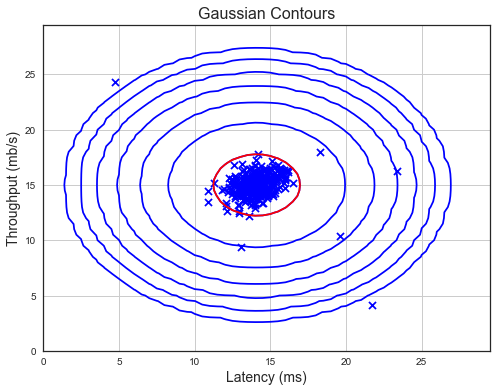

In [65]:
Mu, sigma2 = estimateGaussian(x, False)
plotData(x)
plotContours(Mu, sigma2, False, False)

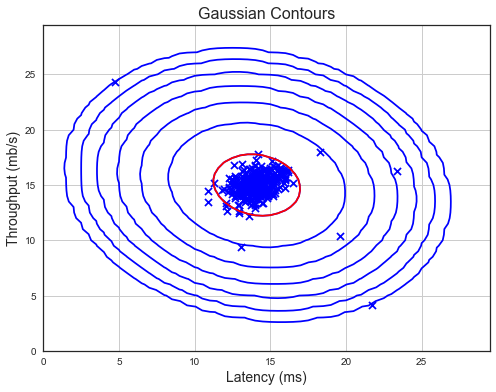

In [69]:
Mu, sigma2 = estimateGaussian(x, True)
plotData(x)
plotContours(Mu, sigma2, False, True)

In [ ]:
def selectThreshold (yval, pval):
    